In [1]:
from util.util_print import plot_refacc
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
evaluate_list = list(sorted(os.listdir('/home/qimin/Downloads/eval_all/')))

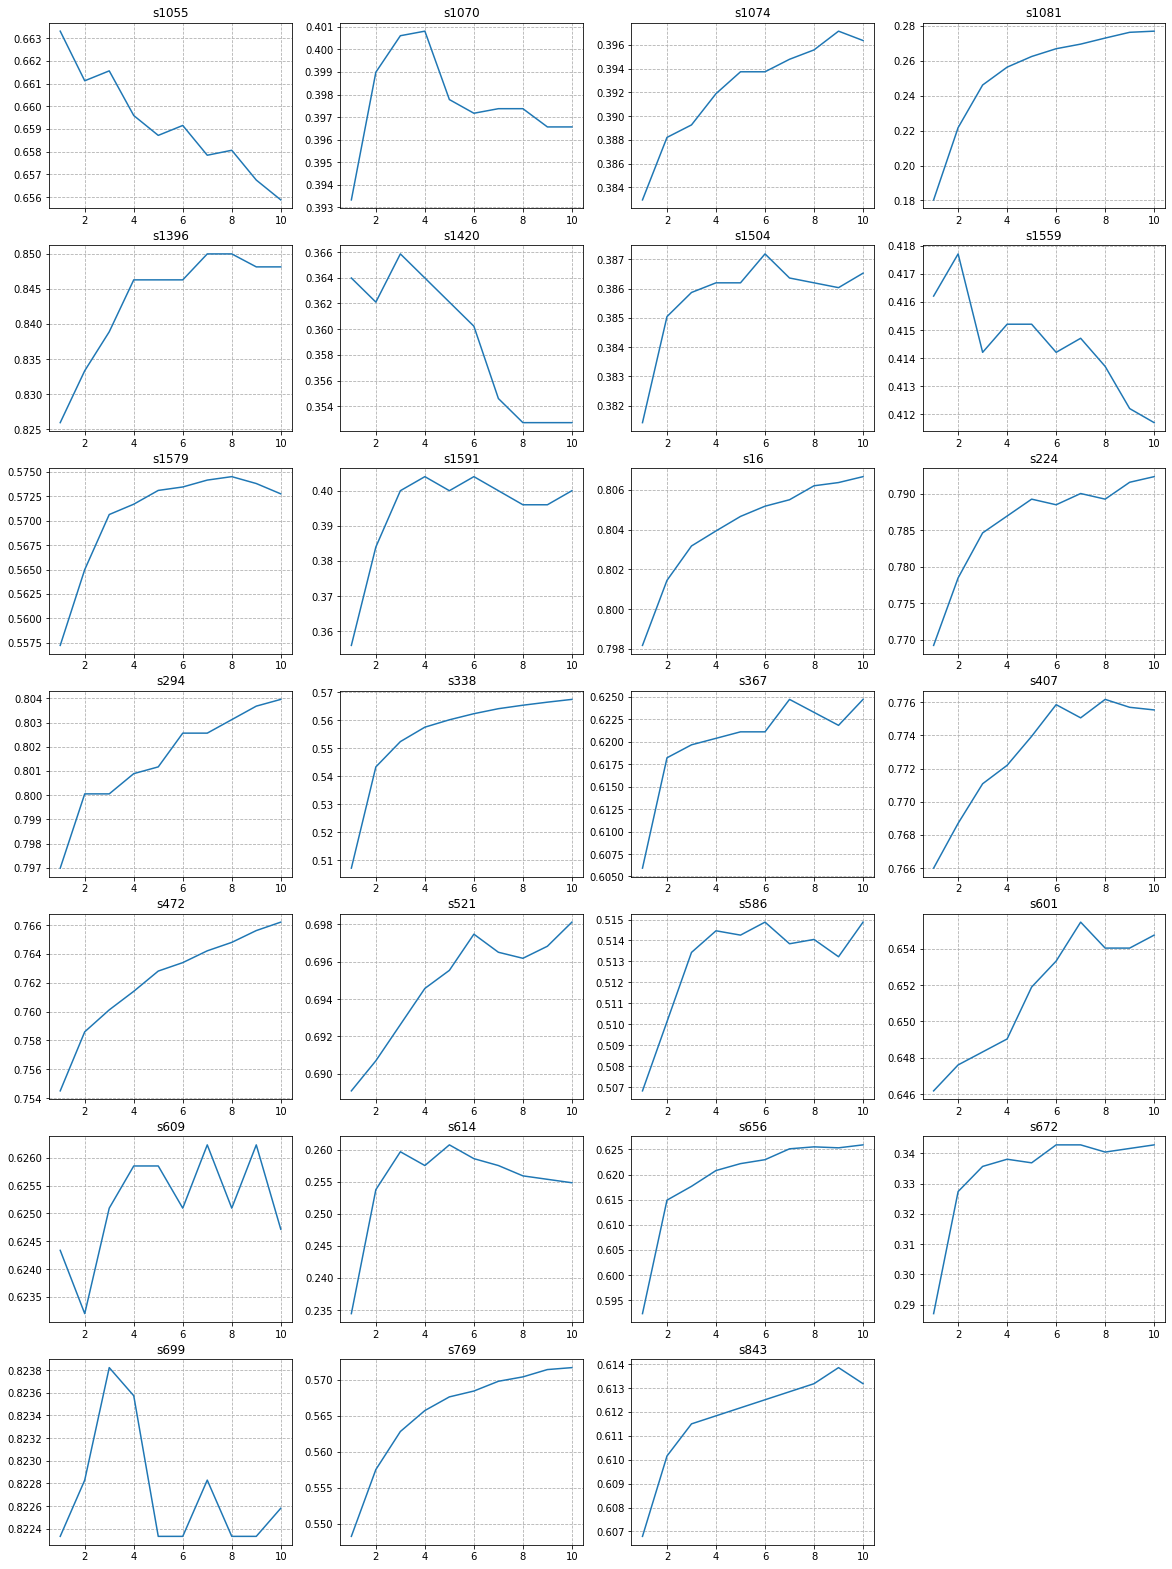

In [54]:
plt.figure(figsize=(20, 28))
for i in range(len(evaluate_list)):
    filename = '/home/qimin/Downloads/eval_all/' + evaluate_list[i]
    with open(filename, 'r') as f:
        status = json.load(f)
    plt.subplot(7,4,i+1)
    refacc = status['refacc']
    plt.plot(list(range(1, len(refacc) + 1)), refacc)
    plt.title(evaluate_list[i].split('.')[0])
    plt.grid(True, ls='--', lw=0.8)

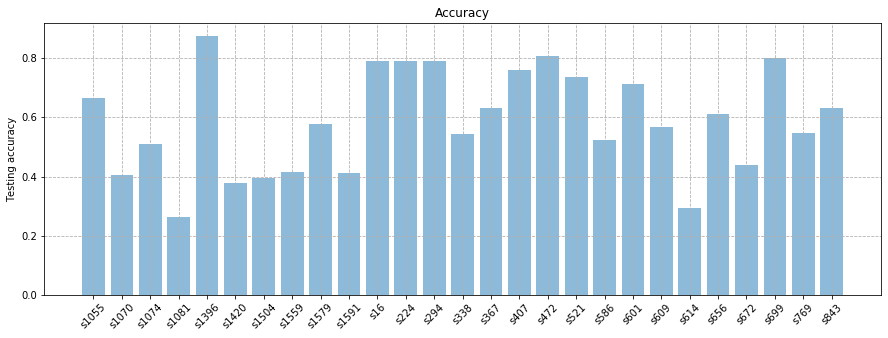

In [39]:
test_acc = []
x_tick = [i.split('.')[0] for i in evaluate_list]
for i in range(len(evaluate_list)):
    filename = '/home/qimin/Downloads/eval_all/' + evaluate_list[i]
    with open(filename, 'r') as f:
        status = json.load(f)
    test_acc.append(sum(status['acc'])/len(status['acc']))
plt.figure(figsize=(15, 5))
plt.bar(list(range(len(evaluate_list))), test_acc, align='center', alpha=0.5)
plt.xticks(list(range(len(evaluate_list))), x_tick, rotation=45)
plt.ylabel('Testing accuracy')
plt.title('Accuracy')
plt.grid(True, ls='--', lw=0.8)
plt.show()

In [2]:
lrs = ['max-lr 0.01', 'max-lr 0.05', 'max-lr 0.1', 'max-lr 0.2', 'max-lr 0.5', 'max-lr 1.0']
cl = ['red', 'orange', 'blue', 'olive', 'gold', 'gray']

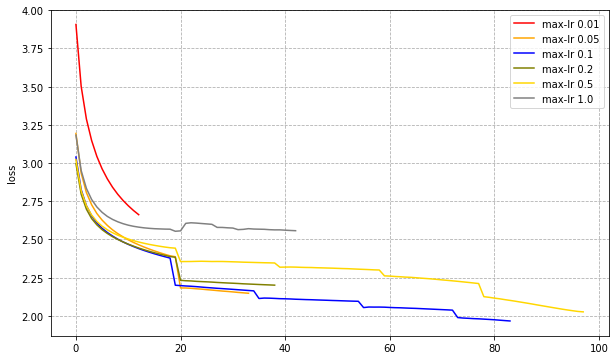

In [5]:
loss_list = list(sorted(os.listdir('/home/qimin/Downloads/loss/')))
plt.figure(figsize=(10, 6))
for i in range(len(loss_list)):
    loss = []
    filename = '/home/qimin/Downloads/loss/' + loss_list[i] + '/0/epoch_loss.csv'
    f = pd.read_csv(filename)
    for index, row in f.iterrows():
        if row['phase'] == 'train':
            loss.append(row['loss'])
    plt.plot(loss, label=lrs[i], color=cl[i])
    plt.ylabel('loss')
    plt.grid(True, ls='--', lw=0.8)
    plt.legend()

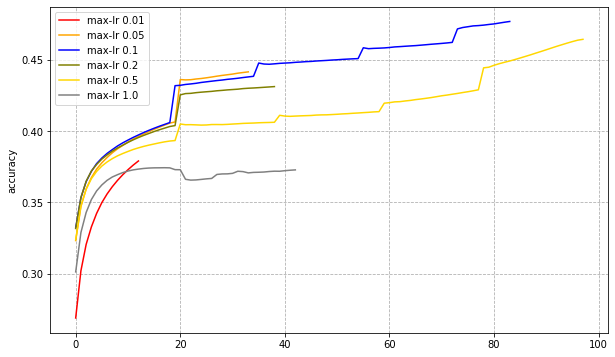

In [6]:
loss_list = list(sorted(os.listdir('/home/qimin/Downloads/loss/')))
plt.figure(figsize=(10, 6))
for i in range(len(loss_list)):
    acc = []
    filename = '/home/qimin/Downloads/loss/' + loss_list[i] + '/0/epoch_loss.csv'
    f = pd.read_csv(filename)
    for index, row in f.iterrows():
        if row['phase'] == 'train':
            acc.append(row['accuracy'])
    plt.plot(acc, label=lrs[i], color=cl[i])
    plt.ylabel('accuracy')
    plt.grid(True, ls='--', lw=0.8)
    plt.legend()